#0.Kết nối Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/DA_TITANIT

/content/drive/MyDrive/DA_TITANIT


#1.Cài đặt và nhập thư viện cần thiết

In [ ]:
!pip install fancyimpute

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# 2.Tải và kiểm tra dữ liệu Titanic

**Ý nghĩa của các cột**

- **PassengerId**: Số thứ tự của từng hành khách.
- **Survived**: Hành khác có sống sót hay không (1 = sống sót, 0 = không sống sót).
- **Pclass**: Hạng vé của hành khách, phản ánh tầng lớp kinh tế-xã hội của hành khách đó (social-economic status).
    + 1: Hạng vé thấp.
    + 2: Hạng vé trung bình.
    + 3: Hạng vé cao cấp.
- **Name**: Tên hành khách (Họ, Tên).
- **Sex**: Giới tính của hành khách.
- **male**: nam.
- **female**: nữ.
- **Age**: Tuổi của hành khách.
- **SibSp**: Số anh/chị/em hoặc vợ/chồng có trên tàu Titanic.
- **Parch**: Số cha/mẹ hoặc con trên có trên tàu Titanic.
- **Ticket**: Số vé của hành khách.
- **Fare**: Giá vé của hành khách.
- **Cabin**: Số cabin của hành khách.
- **Embarked**: Điểm lên tàu của hành khách.
    + C = Cherbourg.
    + Q = Queenstown.
    + S = Southampton.

In [199]:
# Đọc dữ liệu titanic
df = pd.read_csv('titanic.csv')

In [26]:
df.head() # hiển thị 5 hàng đầu tiên

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
print(df.info())  # Kiểm tra thông tin các cột và kiểu dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     891 non-null    float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1046 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB
None


# 3.Phân tích dữ liệu thiếu

**3.1. Kiểm tra và tính toán dữ liệu thiếu**

In [200]:
# Kiểm tra dữ liệu thiếu
missing_data = df.isnull().sum()

# Tính tỷ lệ phần trăm dữ liệu thiếu
missing_percentage = (missing_data / len(df)) * 100

# Hiển thị tỷ lệ phần trăm dữ liệu thiếu của mỗi cột
print(missing_percentage)

Unnamed: 0      0.000000
PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64


**3.2. Vẽ heatmap để trực quan hóa dữ liệu thiếu**

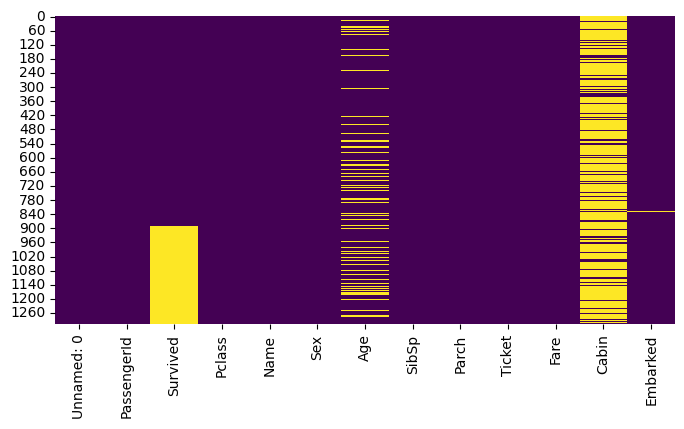

In [201]:
# Vẽ heatmap dữ liệu thiếu
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

**Nhận xét về dữ liệu thiếu:**
- **Survived**:

Dữ liệu thiếu rất ít, gần như không có giá trị thiếu trong cột này. Điều này là hợp lý vì Survived là cột mục tiêu trong bài toán phân loại.

- **Age**:

Cột này có khá nhiều giá trị thiếu (những dòng màu vàng dọc theo cột "Age"). Việc thiếu giá trị ở cột này khá phổ biến trong dữ liệu Titanic, và sẽ cần một chiến lược như imputation (thay thế giá trị thiếu bằng giá trị trung bình hoặc trung vị) để xử lý.

- **Cabin**:

Cột Cabin có rất nhiều giá trị thiếu, gần như tất cả các giá trị đều bị thiếu (hiển thị dưới dạng các dòng màu vàng dài). Điều này có thể là do chỉ một phần nhỏ của hành khách có thông tin về cabin của họ. Bạn có thể lựa chọn xóa cột này hoặc áp dụng một kỹ thuật như imputation (có thể sử dụng mô hình hoặc gán giá trị cho cột này).
- **Các cột khác (Fare, Embarked, Pclass, Name, Sex, Ticket, SibSp, Parch)**:

Những cột này không có nhiều giá trị thiếu (dòng màu vàng). Bạn có thể xử lý chúng bằng các phương pháp đơn giản như thay thế giá trị thiếu bằng giá trị trung bình, trung vị, hoặc sử dụng KNN.

# 4.Xử lý dữ liệu thiếu (Drop rows with missing data) và áp dụng Logistic Regression

**Drop rows with missing data**

In [31]:
# Loại bỏ các dòng có dữ liệu thiếu
df_dropped = df.dropna()

# Kiểm tra lại dữ liệu sau khi loại bỏ
print(df_dropped.info())


<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   183 non-null    int64  
 1   PassengerId  183 non-null    int64  
 2   Survived     183 non-null    float64
 3   Pclass       183 non-null    int64  
 4   Name         183 non-null    object 
 5   Sex          183 non-null    object 
 6   Age          183 non-null    float64
 7   SibSp        183 non-null    int64  
 8   Parch        183 non-null    int64  
 9   Ticket       183 non-null    object 
 10  Fare         183 non-null    float64
 11  Cabin        183 non-null    object 
 12  Embarked     183 non-null    object 
dtypes: float64(3), int64(5), object(5)
memory usage: 20.0+ KB
None


**Mã hóa các cột phân loại**

In [36]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Mã hóa cột 'Sex'
df_dropped['Sex'] = label_encoder.fit_transform(df_dropped['Sex'])

# Kiểm tra lại dữ liệu
print(df_dropped['Sex'].head())


1     0
3     0
6     1
10    0
11    0
Name: Sex, dtype: int64


<ipython-input-36-eefea9b07a44>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Sex'] = label_encoder.fit_transform(df_dropped['Sex'])


In [37]:
# Mã hóa cột 'Embarked' với One-Hot Encoding
df_dropped = pd.get_dummies(df_dropped, columns=['Embarked'], drop_first=True)

# Kiểm tra lại dữ liệu
print(df_dropped.head())


    Unnamed: 0  PassengerId  Survived  Pclass  \
1            1            2       1.0       1   
3            3            4       1.0       1   
6            6            7       0.0       1   
10          10           11       1.0       3   
11          11           12       1.0       1   

                                                 Name  Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
6                             McCarthy, Mr. Timothy J    1  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut    0   4.0      1   
11                           Bonnell, Miss. Elizabeth    0  58.0      0   

    Parch    Ticket     Fare Cabin  Embarked_Q  Embarked_S  
1       0  PC 17599  71.2833   C85       False       False  
3       0    113803  53.1000  C123       False        True  
6       0     17463  51.8625   E46       False        True  
10      1 

**Loại bỏ các cột không liên quan**

In [38]:
# Loại bỏ các cột không liên quan
X = df_dropped.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  # Loại bỏ cột mục tiêu và các cột không cần thiết
y = df_dropped['Survived']  # Cột mục tiêu


**Chia dữ liệu thành tập huấn luyện và kiểm tra**

In [41]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước dữ liệu huấn luyện và kiểm tra
print(X_train.shape, X_test.shape)


(146, 10) (37, 10)


**Huấn luyện mô hình Logistic Regression**

In [42]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
lr = LogisticRegression(max_iter=1000)

# Huấn luyện mô hình với dữ liệu huấn luyện
lr.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = lr.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Đánh giá mô hình**

In [43]:
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# In kết quả
print("Logistic Regression - Evaluation Results")
print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print(f"RMSE: {rmse}")


Logistic Regression - Evaluation Results
Accuracy: 0.7567567567567568
F1-Score: 0.8163265306122449
RMSE: 0.4931969619160719


# 5.Xử lý dữ liệu thiếu (Mean/Median Imputation) và áp dụng Logistic Regression

**Mean/Median Imputation**

**Xử lý các giá trị thiếu trong các cột số**

In [105]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('titanic.csv')


In [108]:
# Kiểm tra thông tin dữ liệu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     891 non-null    float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1046 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB
None


In [109]:
# Xử lý các giá trị thiếu trong cột 'Age' và 'Fare' với phương pháp median (trung vị)
imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])


In [110]:
# Khởi tạo SimpleImputer với chiến lược 'median' (trung vị)
imputer_survived = SimpleImputer(strategy='median')

# Áp dụng SimpleImputer cho cột 'Survived'
df['Survived'] = imputer_survived.fit_transform(df[['Survived']])

# Kiểm tra lại sau khi thay thế giá trị thiếu trong 'Survived'
print(df['Survived'].head())


0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     1309 non-null   float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1309 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1309 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


**Mã hóa các cột phân loại**

In [112]:
from sklearn.preprocessing import LabelEncoder

# Mã hóa cột 'Sex'
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Kiểm tra lại
print(df['Sex'].head())


0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


In [113]:
# Mã hóa cột 'Embarked' bằng LabelEncoder trước khi xử lí thiếu
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Kiểm tra lại sau khi mã hóa
print(df['Embarked'].head())


0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     1309 non-null   float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   int64  
 6   Age          1309 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1309 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1309 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 133.1+ KB


**Loại bỏ các cột không liên quan**

In [115]:
# Loại bỏ các cột không cần thiết
X = df.drop(['Survived', 'Unnamed: 0', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

# Kiểm tra lại sau khi loại bỏ
print(X.head())


   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2


**Chia dữ liệu thành tập huấn luyện và kiểm tra**

In [116]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước dữ liệu huấn luyện và kiểm tra
print(X_train.shape, X_test.shape)


(1047, 7) (262, 7)


**Huấn luyện mô hình Logistic Regression**

In [117]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
lr = LogisticRegression(max_iter=1000)

# Huấn luyện mô hình với dữ liệu huấn luyện
lr.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = lr.predict(X_test)

# Kiểm tra dự đoán
print(y_pred[:10])  # In 10 giá trị dự đoán đầu tiên


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [118]:
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# In kết quả
print("Logistic Regression - Evaluation Results")
print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print(f"RMSE: {rmse}")


Logistic Regression - Evaluation Results
Accuracy: 0.767175572519084
F1-Score: 0.46956521739130436
RMSE: 0.4825188364001099


# 6.Xử lý dữ liệu thiếu (Advanced techniques (KNN, MICE,...)) và áp dụng Logistic Regression

#6.1 Xử lý dữ liệu thiếu với KNN

**KNN**

In [165]:
df = pd.read_csv('titanic.csv')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     891 non-null    float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1046 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [167]:
from sklearn.impute import KNNImputer
# Khởi tạo KNNImputer với k=5 (5 láng giềng gần nhất)
knn_imputer = KNNImputer(n_neighbors=5)

In [168]:
# Áp dụng KNNImputer cho các cột 'Age', 'Fare' và 'Embarked'
df[['Age', 'Fare']] = knn_imputer.fit_transform(df[['Age', 'Fare']])

In [169]:
# Kiểm tra lại sau khi áp dụng KNNImputer
print(df[['Age', 'Fare']].head())

    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


In [170]:
from sklearn.impute import SimpleImputer

# Khởi tạo SimpleImputer với chiến lược 'most_frequent' (giá trị xuất hiện nhiều nhất)
imputer = SimpleImputer(strategy='most_frequent')

# Áp dụng SimpleImputer cho cột 'Survived'
df['Survived'] = imputer.fit_transform(df[['Survived']])

# Kiểm tra lại sau khi thay thế giá trị thiếu
print(df['Survived'].head())


0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     1309 non-null   float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1309 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1309 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


**Mã hóa các cột phân loại**

In [172]:
from sklearn.preprocessing import LabelEncoder

# Mã hóa cột 'Sex'
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Kiểm tra lại
print(df['Sex'].head())


0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


In [173]:
# Mã hóa cột 'Embarked' bằng LabelEncoder trước khi xử lí thiếu
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Kiểm tra lại sau khi mã hóa
print(df['Embarked'].head())


0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64


**Loại bỏ các cột không cần thiết**

In [174]:
# Loại bỏ các cột không cần thiết
X = df.drop(['Survived', 'Unnamed: 0', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

# Kiểm tra lại sau khi loại bỏ
print(X.head())


   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2


**Chia tập dữ liệu**

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Kiểm tra kích thước dữ liệu huấn luyện và kiểm tra
print(X_train.shape, X_test.shape)

(1047, 7) (262, 7)


**Huấn luyện với Logistics Regression**

In [176]:
# Huấn luyện mô hình Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = lr.predict(X_test)

**Đánh giá mô hình**

In [177]:

from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# In kết quả
print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print(f"RMSE: {rmse}")

Accuracy: 0.767175572519084
F1-Score: 0.46956521739130436
RMSE: 0.4825188364001099


#6.2 Xứ lý dữ liệu thiếu với MICE

**MICE**

In [191]:
df = pd.read_csv('titanic.csv')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     891 non-null    float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1046 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [193]:
# Thay thế giá trị thiếu trong Survived bằng Mode Imputation
from sklearn.impute import SimpleImputer

# Khởi tạo SimpleImputer với chiến lược 'most_frequent' (giá trị phổ biến nhất)
imputer_survived = SimpleImputer(strategy='most_frequent')

# Áp dụng SimpleImputer cho cột 'Survived'
df['Survived'] = imputer_survived.fit_transform(df[['Survived']])

# Kiểm tra lại sau khi thay thế giá trị thiếu trong 'Survived'
print(df['Survived'].head())


0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64


In [194]:
# Sử dụng MICE cho các cột còn lại
from fancyimpute import IterativeImputer

# Khởi tạo MICE (IterativeImputer)
mice_imputer = IterativeImputer()

# Áp dụng MICE cho toàn bộ bộ dữ liệu (bao gồm các cột có giá trị thiếu)
df_imputed = mice_imputer.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Chuyển đổi kết quả sau khi áp dụng MICE trở lại thành DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Thêm lại các cột không bị thay đổi (các cột 'object' như 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked')
df_imputed['Name'] = df['Name']
df_imputed['Sex'] = df['Sex']
df_imputed['Ticket'] = df['Ticket']
df_imputed['Cabin'] = df['Cabin']
df_imputed['Embarked'] = df['Embarked']

# Kiểm tra lại sau khi áp dụng MICE
print(df_imputed.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   float64
 1   PassengerId  1309 non-null   float64
 2   Survived     1309 non-null   float64
 3   Pclass       1309 non-null   float64
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   float64
 6   Parch        1309 non-null   float64
 7   Fare         1309 non-null   float64
 8   Name         1309 non-null   object 
 9   Sex          1309 non-null   object 
 10  Ticket       1309 non-null   object 
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(8), object(5)
memory usage: 133.1+ KB
None


**Mã hóa các cột phân loại**

In [195]:
from sklearn.preprocessing import LabelEncoder

# Mã hóa cột 'Sex'
label_encoder = LabelEncoder()
df_imputed['Sex'] = label_encoder.fit_transform(df_imputed['Sex'])

# Mã hóa cột 'Embarked' với One-Hot Encoding
df_imputed = pd.get_dummies(df_imputed, columns=['Embarked'], drop_first=True)

# Kiểm tra lại sau khi mã hóa
print(df_imputed.head())

   Unnamed: 0  PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0         0.0          1.0       0.0     3.0  22.0    1.0    0.0   7.2500   
1         1.0          2.0       1.0     1.0  38.0    1.0    0.0  71.2833   
2         2.0          3.0       1.0     3.0  26.0    0.0    0.0   7.9250   
3         3.0          4.0       1.0     1.0  35.0    1.0    0.0  53.1000   
4         4.0          5.0       0.0     3.0  35.0    0.0    0.0   8.0500   

                                                Name  Sex            Ticket  \
0                            Braund, Mr. Owen Harris    1         A/5 21171   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0          PC 17599   
2                             Heikkinen, Miss. Laina    0  STON/O2. 3101282   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0            113803   
4                           Allen, Mr. William Henry    1            373450   

  Cabin  Embarked_Q  Embarked_S  
0   NaN       False        T

**Loại bỏ các cột không cần thiết**

In [196]:
# Loại bỏ các cột không cần thiết
X = df_imputed.drop(['Survived', 'Unnamed: 0', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df_imputed['Survived']  # Cột mục tiêu

# Kiểm tra lại sau khi loại bỏ
print(X.head())


   Pclass   Age  SibSp  Parch     Fare  Sex  Embarked_Q  Embarked_S
0     3.0  22.0    1.0    0.0   7.2500    1       False        True
1     1.0  38.0    1.0    0.0  71.2833    0       False       False
2     3.0  26.0    0.0    0.0   7.9250    0       False        True
3     1.0  35.0    1.0    0.0  53.1000    0       False        True
4     3.0  35.0    0.0    0.0   8.0500    1       False        True


**Chia dữ liệu thành tập huấn luyện và kiểm tra**

In [197]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước dữ liệu huấn luyện và kiểm tra
print(X_train.shape, X_test.shape)


(1047, 8) (262, 8)


**Huấn luyện mô hình Logistic Regression và đánh giá**

In [198]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
lr = LogisticRegression(max_iter=1000)

# Huấn luyện mô hình với dữ liệu huấn luyện
lr.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = lr.predict(X_test)

# Đánh giá mô hình
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# In kết quả
print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print(f"RMSE: {rmse}")


Accuracy: 0.7748091603053435
F1-Score: 0.48695652173913045
RMSE: 0.4745427690890005
